In [43]:
import numpy as np
import umap
import hdbscan
import pickle

In [46]:
?umap.UMAP

Init signature:
umap.UMAP(
    n_neighbors=15,
    n_components=2,
    metric='euclidean',
    metric_kwds=None,
    output_metric='euclidean',
    output_metric_kwds=None,
    n_epochs=None,
    learning_rate=1.0,
    init='spectral',
    min_dist=0.1,
    spread=1.0,
    low_memory=True,
    n_jobs=-1,
    set_op_mix_ratio=1.0,
    local_connectivity=1.0,
    repulsion_strength=1.0,
    negative_sample_rate=5,
    transform_queue_size=4.0,
    a=None,
    b=None,
    random_state=None,
    angular_rp_forest=False,
    target_n_neighbors=-1,
    target_metric='categorical',
    target_metric_kwds=None,
    target_weight=0.5,
    transform_seed=42,
    transform_mode='embedding',
    force_approximation_algorithm=False,
    verbose=False,
    tqdm_kwds=None,
    unique=False,
    densmap=False,
    dens_lambda=2.0,
    dens_frac=0.3,
    dens_var_shift=0.1,
    output_dens=False,
    disconnection_distance=None,
    precomputed_knn=(None, None, None),
)
Docstring:     
Uniform Manifold

In [5]:
with open("../../Data/Embeddings_old/20_ng_text_embeddings.pkl", "rb") as f:
    data = pickle.load(f)

In [6]:
embeddings = data["embedding"]
texts = data["text"]

In [7]:
ump = umap.UMAP(n_neighbors=30, min_dist=0, metric="cosine", random_state=42, verbose=True, n_components=20)
ump.fit(embeddings)
ump_embedding = ump.transform(embeddings)

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0, n_components=20, n_neighbors=30, random_state=42, verbose=True)
Thu Jul 27 12:30:52 2023 Construct fuzzy simplicial set
Thu Jul 27 12:30:52 2023 Finding Nearest Neighbors
Thu Jul 27 12:30:52 2023 Building RP forest with 12 trees
Thu Jul 27 12:31:00 2023 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Thu Jul 27 12:31:23 2023 Finished Nearest Neighbor Search
Thu Jul 27 12:31:27 2023 Construct embedding


Epochs completed: 100%| ██████████ 200/200 [00:37]


Thu Jul 27 12:32:06 2023 Finished embedding


UMAP(angular_rp_forest=True, metric='cosine', min_dist=0, n_neighbors=30, random_state=42, verbose=True)
Thu Jul 27 12:32:06 2023 Construct fuzzy simplicial set
Thu Jul 27 12:32:06 2023 Finding Nearest Neighbors
Thu Jul 27 12:32:06 2023 Building RP forest with 12 trees
Thu Jul 27 12:32:07 2023 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Thu Jul 27 12:32:13 2023 Finished Nearest Neighbor Search
Thu Jul 27 12:32:14 2023 Construct embedding


Epochs completed: 100%| ██████████ 200/200 [00:16]


Thu Jul 27 12:32:32 2023 Finished embedding


C:\Users\arik_\AppData\Local\Temp\ipykernel_8476\1013081128.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(ump_embedding2[:, 0], ump_embedding2[:, 1], s=0.1, cmap="Spectral")


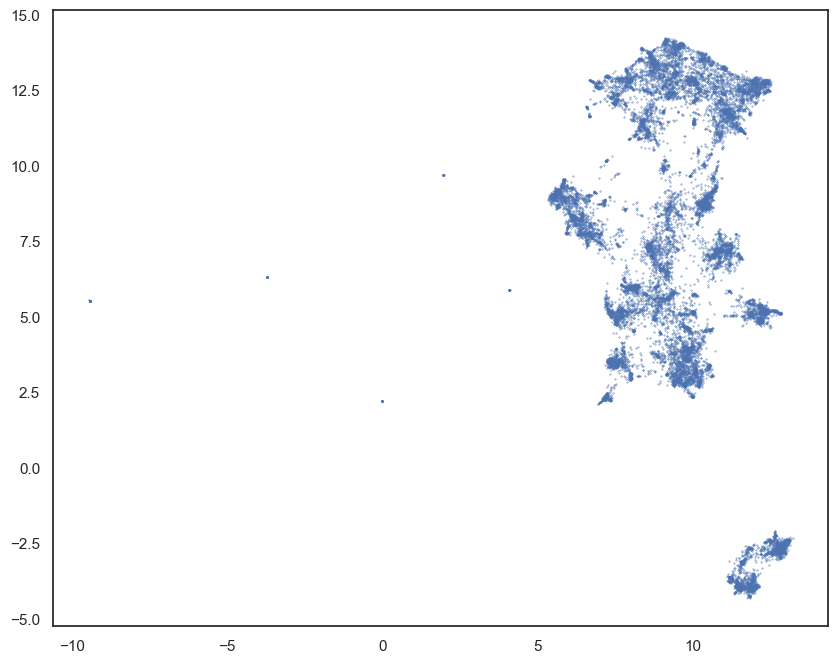

In [8]:
#  compute embedding in 2d and plot result
ump2 = umap.UMAP(n_neighbors=30, min_dist=0, metric="cosine", random_state=42, verbose=True, n_components=2)
ump2.fit(embeddings)
ump_embedding2 = ump2.transform(embeddings)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white", rc={"figure.figsize": (10, 8)})
plt.scatter(ump_embedding2[:, 0], ump_embedding2[:, 1], s=0.1, cmap="Spectral")
plt.show()

In [19]:
min_cluster_size = 20
min_samples = 50

clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
cluster_labels = clusterer.fit_predict(ump_embedding2)

In [26]:
unique_labels = np.unique(cluster_labels)
n_clusters = len(unique_labels[unique_labels != -1])
umap_result = ump_embedding2

In [40]:
def visualize_clusters(embeddings_2d, labels):
    # Create a color palette, then map the labels to the colors.
    # We add one to the number of unique labels to account for the noise points labelled as -1.
    palette = plt.cm.get_cmap("tab20", len(np.unique(labels)) + 1)
    
    # Create a new figure
    fig, ax = plt.subplots(figsize=(10, 8))

    outlier_shown_in_legend = False

    # Iterate through all unique labels (clusters and outliers)
    for label in np.unique(labels):
        # Find the embeddings that are part of this cluster
        cluster_points = embeddings_2d[labels == label]
        
        # If label is -1, these are outliers. We want to display them in grey.
        if label == -1:
            color = 'grey'
            if not outlier_shown_in_legend:
                ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label='outlier', s = 1)
                outlier_shown_in_legend = True
            else:
                ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, s = 1)
        else:
            color = palette(label)
            # Plot the points in this cluster without a label to prevent them from showing up in the legend
            ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, s = 1)
        
    # Add a legend
    ax.legend()

    # Show the plot
    plt.show()


C:\Users\arik_\AppData\Local\Temp\ipykernel_8476\2859025475.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  palette = plt.cm.get_cmap("tab20", len(np.unique(labels)) + 1)
C:\Users\arik_\AppData\Local\Temp\ipykernel_8476\2859025475.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, s = 1)


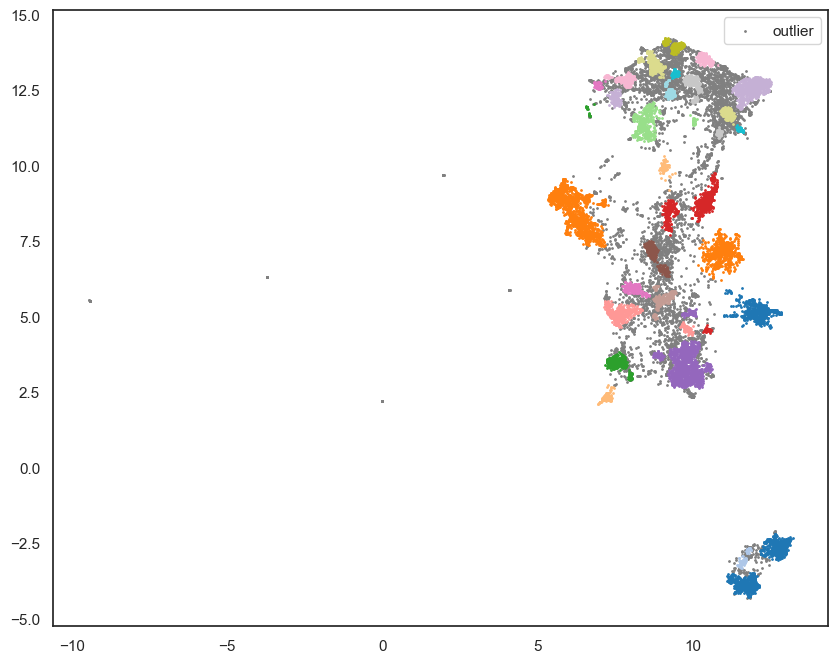

In [42]:
visualize_clusters(ump_embedding2, cluster_labels)

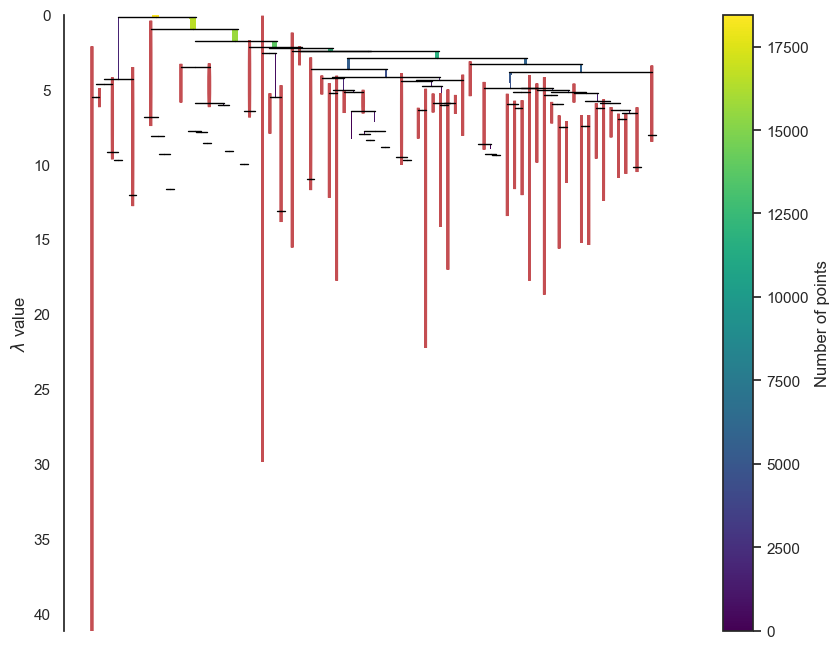

In [22]:
# plot dendrogram
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette("deep", 8))
plt.show()